# Loan Approval Prediction Using SVM

______________________________________
#### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

### Data Collection & Data Analysis

##### Loading Data set

In [2]:
loan = pd.read_excel("loan.xlsx")

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# we have null values in the dataset

<Axes: >

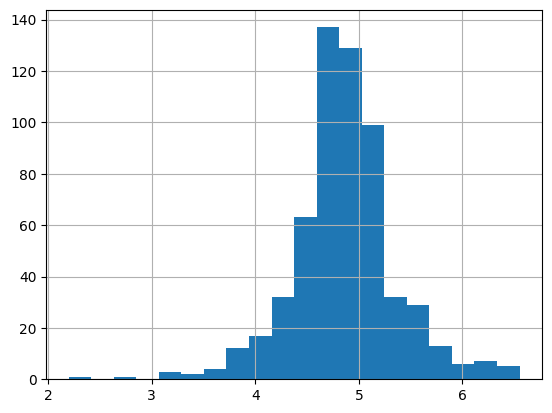

In [8]:
loan['loanAmount_log'] = np.log(loan['LoanAmount'])
loan['loanAmount_log'].hist(bins = 20)

In [9]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

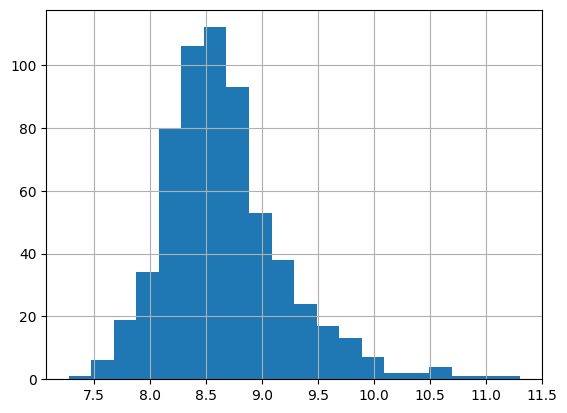

In [10]:
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan['loanAmount_log'] = np.log(loan['TotalIncome'])
loan['loanAmount_log'].hist(bins = 20)

In [11]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log        0
TotalIncome           0
dtype: int64

In [12]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace = True)

In [13]:
loan.LoanAmount = loan.LoanAmount.fillna(loan.LoanAmount.mean())
loan.loanAmount_log = loan.loanAmount_log.fillna(loan.loanAmount_log.mean())

In [14]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
dtype: int64

### Separating the features and target

In [15]:
X = loan.iloc[:,np.r_[1:5,9:11,13:15]].values
Y = loan.iloc[:,12].values

In [16]:
X

array([['Male', 'No', 0, ..., 1.0, 8.674025985443025, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 8.714567550836485, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 8.006367567650246, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 9.025455532779063, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 8.933664178700935, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 8.430109084509125, 4583.0]],
      dtype=object)

In [17]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Gender
Male      502
Female    112
Name: count, dtype: int64


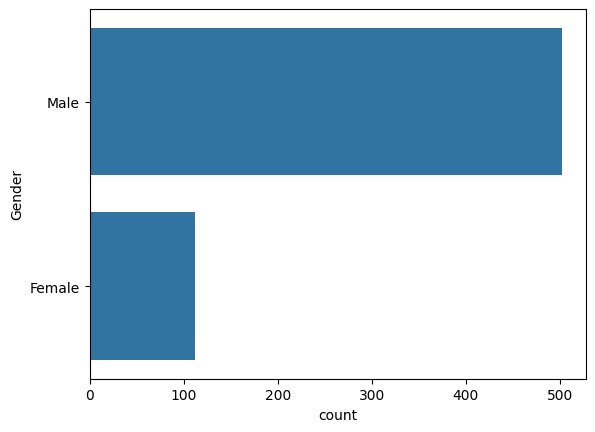

In [18]:
sns.countplot(loan['Gender'])
print(loan['Gender'].value_counts())

Married
Yes    401
No     213
Name: count, dtype: int64


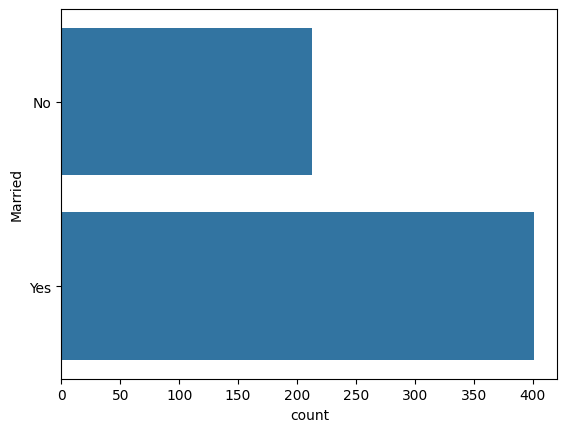

In [19]:
sns.countplot(loan['Married'])
print(loan['Married'].value_counts())

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


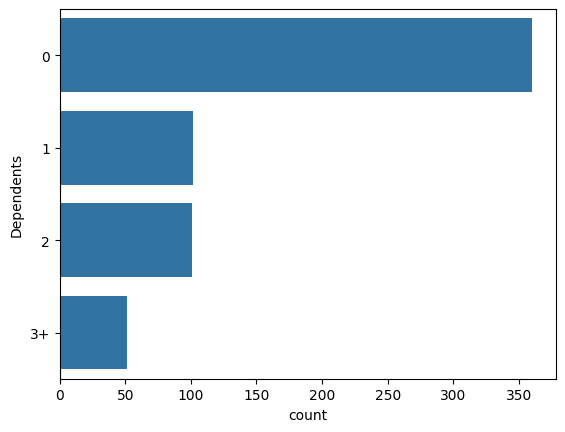

In [20]:
sns.countplot(loan['Dependents'])
print(loan['Dependents'].value_counts())

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


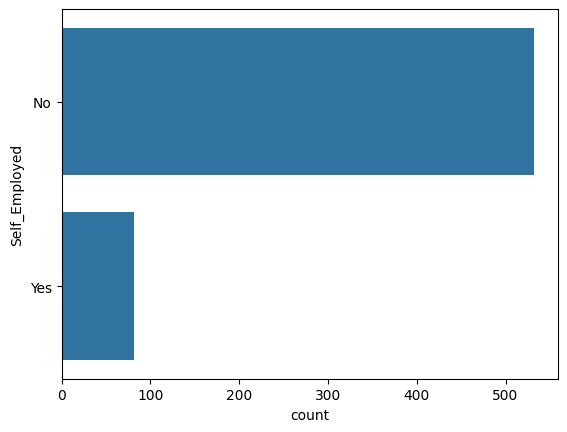

In [21]:
sns.countplot(loan['Self_Employed'])
print(loan['Self_Employed'].value_counts())

LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


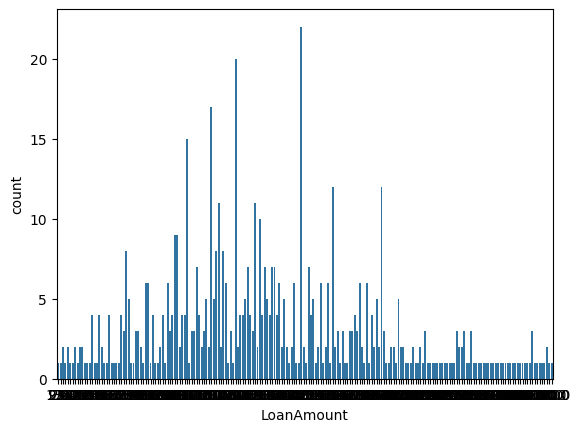

In [22]:
sns.countplot(x='LoanAmount', data = loan)
print(loan['LoanAmount'].value_counts())

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


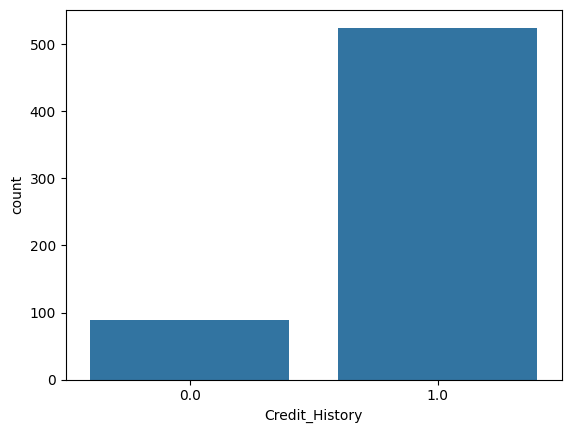

In [23]:
sns.countplot(x='Credit_History', data = loan)
print(loan['Credit_History'].value_counts())

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 2, test_size = 0.2)

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()


In [26]:
for i in range(0,5):
    column_data = X_train[:, i].astype(str)
    X_train[:, i] = label_encoder_x.fit_transform(column_data)

column_data = X_train[:, 7].astype(str)
X_train[:, 7] = label_encoder_x.fit_transform(column_data)

X_train

array([[1, 0, 0, ..., 1.0, 8.659039915644474, 317],
       [1, 1, 0, ..., 1.0, 8.461046030793236, 229],
       [1, 1, 2, ..., 1.0, 9.752432077616172, 47],
       ...,
       [0, 0, 0, ..., 1.0, 9.756320761816548, 48],
       [1, 1, 1, ..., 0.0, 8.812099108957337, 376],
       [1, 0, 0, ..., 0.0, 7.71289096149013, 63]], dtype=object)

In [27]:
label_encoder_y = LabelEncoder()

Y_train = label_encoder_y.fit_transform(Y_train)

Y_train

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [28]:
for i in range(0,5):
    column_data = X_test[:, i].astype(str)
    X_test[:, i] = label_encoder_x.fit_transform(column_data)

column_data = X_test[:, 7].astype(str)
X_test[:, 7] = label_encoder_x.fit_transform(column_data)

X_test

array([[0, 1, 0, 1, 3, 0.0, 8.591558273371545, 81],
       [1, 1, 0, 0, 3, 0.0, 8.56216655705897, 80],
       [1, 0, 0, 0, 3, 1.0, 8.928242677818302, 107],
       [1, 1, 1, 0, 1, 1.0, 8.291045131081729, 50],
       [1, 1, 3, 1, 4, 1.0, 7.946263643580541, 22],
       [1, 0, 0, 0, 3, 1.0, 8.236685322712457, 44],
       [0, 0, 1, 0, 3, 1.0, 8.20303024171486, 37],
       [1, 1, 0, 0, 3, 1.0, 8.236155661683124, 43],
       [1, 1, 1, 0, 3, 1.0, 8.960210955576986, 108],
       [1, 1, 0, 1, 3, 1.0, 8.363109176033522, 55],
       [0, 1, 0, 0, 1, 1.0, 9.215029361462314, 0],
       [1, 0, 0, 1, 3, 1.0, 8.493924564476883, 72],
       [1, 0, 0, 0, 3, 1.0, 8.597297435657898, 82],
       [1, 1, 1, 0, 3, 1.0, 8.714567550836485, 89],
       [1, 1, 0, 0, 3, 1.0, 9.722684841711443, 13],
       [1, 1, 2, 0, 3, 0.0, 8.909235279192261, 105],
       [1, 1, 0, 0, 3, 1.0, 8.822322177471738, 97],
       [1, 1, 2, 0, 3, 1.0, 8.262300941787448, 48],
       [1, 1, 0, 0, 0, 1.0, 8.876125585396185, 103],
       [0, 

In [29]:
label_encoder_y = LabelEncoder()

Y_test = label_encoder_y.fit_transform(Y_test)

Y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

### Standard Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Model Training

#### Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

#### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)

GaussianNB()

#### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

### Model Evaluation

#### Accuracy Score

In [35]:
# For Random Forest

from sklearn import metrics
y_pred_rf = rf_clf.predict(X_test)

metrics.accuracy_score(y_pred_rf,Y_test) * 100

69.10569105691057

In [36]:
# For Naive Bayes

y_pred_nb = nb_clf.predict(X_test)

metrics.accuracy_score(y_pred_nb,Y_test) * 100

77.23577235772358

In [37]:
# For Decision Tree

y_pred_dt = dt_clf.predict(X_test)

metrics.accuracy_score(y_pred_dt,Y_test) * 100

66.66666666666666

In [38]:
# For KNN

y_pred_knn = knn_clf.predict(X_test)

metrics.accuracy_score(y_pred_knn,Y_test) * 100

72.35772357723577

#### `Naive Bayes` shows the best accuracy among all the ML algorithms.

_____________________________________________________________________________________